In [1]:
from __future__ import print_function
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D, merge
from keras.utils import np_utils
from keras.optimizers import SGD
from keras import backend as K
from keras.models import Model
from keras.layers.core import Lambda
from keras.callbacks import ModelCheckpoint
import pandas
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

Using TensorFlow backend.


In [2]:
K.set_image_dim_ordering('tf')

batch_size = 32
nb_classes = 10
nb_epoch = 5
rows, cols = 32, 32
channels = 3

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
(img_train, lbl_train), (img_test, lbl_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

print (X_train.shape[1:])

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(32, 32, 3)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
categoryid :[9]
category : truck


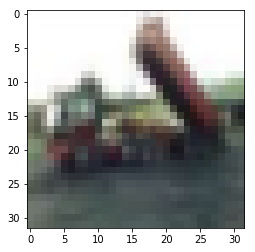

In [4]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
imgid = 2
image = img_train[imgid]
image = image.astype('float32')
image /= 255

%matplotlib inline
imgplot = plt.imshow(image)

categoryid = lbl_train[imgid]

print(categories)
print("categoryid :"+str(categoryid))
print("category : "+str(categories[categoryid[0]]))

In [5]:
model = Sequential()

conv1=Conv2D(96, (3, 3), padding='same', input_shape=(32, 32, 3))
model.add(conv1)
act1=Activation('relu')
model.add(act1)
model.add(Conv2D(96, (3, 3), padding='same'))
act2=Activation('relu')
model.add(act2)
conv3=Conv2D(96, (3, 3), padding='same', strides=(2,2))
model.add(conv3)
model.add(Dropout(0.5))

conv4=Conv2D(192, (3, 3), padding='same')
model.add(conv4)
act3=Activation('relu')
model.add(act3)
model.add(Conv2D(192, (3, 3), padding='same'))
act4=Activation('relu')
model.add(act4)
conv6=Conv2D(192, (3, 3), padding='same', strides=(2,2))
model.add(conv6)
model.add(Dropout(0.5))

model.add(Conv2D(192, (3, 3), padding='same'))
act5=Activation('relu')
model.add(act5)
model.add(Conv2D(192, (1, 1), padding='valid'))
act6=Activation('relu')
model.add(act6)
conv9=Conv2D(10, (1, 1), padding='valid')
model.add(conv9)

gap2d=GlobalAveragePooling2D()
model.add(gap2d)
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       166080    
__________

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) 

datagen.fit(X_train)
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max')

callbacks_list = [checkpoint]
# Fit the model on the batches generated by datagen.flow().
history_callback = model.fit_generator(datagen.flow(X_train, Y_train,
                                    batch_size=batch_size),
                                    steps_per_epoch=2000,
                                    epochs=nb_epoch,
                                    validation_data=(X_test, Y_test),
                                    callbacks=callbacks_list, verbose=1)





Epoch 1/5
2000/2000 [==============================] - 70s 35ms/step - loss: 1.9552 - acc: 0.2575 - val_loss: 1.5712 - val_acc: 0.4262

Epoch 00001: val_acc improved from -inf to 0.42620, saving model to weights.hdf5
Epoch 2/5
2000/2000 [==============================] - 68s 34ms/step - loss: 1.4693 - acc: 0.4605 - val_loss: 1.2536 - val_acc: 0.5379

Epoch 00002: val_acc improved from 0.42620 to 0.53790, saving model to weights.hdf5
Epoch 3/5
2000/2000 [==============================] - 68s 34ms/step - loss: 1.1839 - acc: 0.5753 - val_loss: 1.0218 - val_acc: 0.6376

Epoch 00003: val_acc improved from 0.53790 to 0.63760, saving model to weights.hdf5
Epoch 4/5
2000/2000 [==============================] - 68s 34ms/step - loss: 1.0255 - acc: 0.6368 - val_loss: 0.9629 - val_acc: 0.6637

Epoch 00004: val_acc improved from 0.63760 to 0.66370, saving model to weights.hdf5
Epoch 5/5
2000/2000 [==============================] - 68s 34ms/step - loss: 0.9024 - acc: 0.6810 - val_loss: 0.8059 - val_

category : ship
prediction : ship


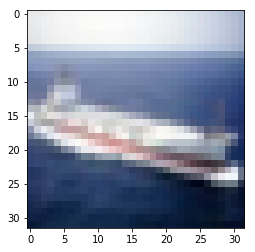

In [37]:
def getImage(id):
    image = img_test[id]
    image = image.astype('float32')
    image /= 255
    return image

def showImage(id):
    image = getImage(id)
    %matplotlib inline
    imgplot = plt.imshow(image)
    labelid = lbl_test[id]
    category = categories[labelid[0]]
    print("category : "+category)    

def predictImage(id):
    image = getImage(id)
    showImage(id)
    image = np.expand_dims(image, axis=0)
    result = model.predict(image)
    result = result[0].tolist()
    best_index=result.index(max(result))
    print ("prediction : "+categories[best_index])
    
id=54    
predictImage(id) 

In [38]:
pandas.DataFrame(history_callback.history).to_csv("history.csv")

model.save('keras_allconv.h5')

In [39]:
model_json = model.to_json()
with open("allconv.json", "w") as json_file:
    json_file.write(model_json)

In [40]:
# choose any image to want by specifying the index
img_to_visualize = img_test[id]
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

In [46]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    convolutions = convolutions.transpose([2, 0, 1])
    print ('Shape of conv:', convolutions.shape)
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    print (n)
    
    imgplot = plt.imshow(convolutions[4])
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(24,16))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i])

Shape of conv: (8, 8, 192)
Shape of conv: (192, 8, 8)
14


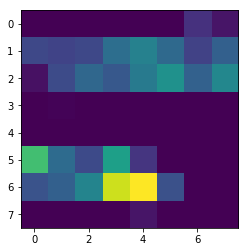

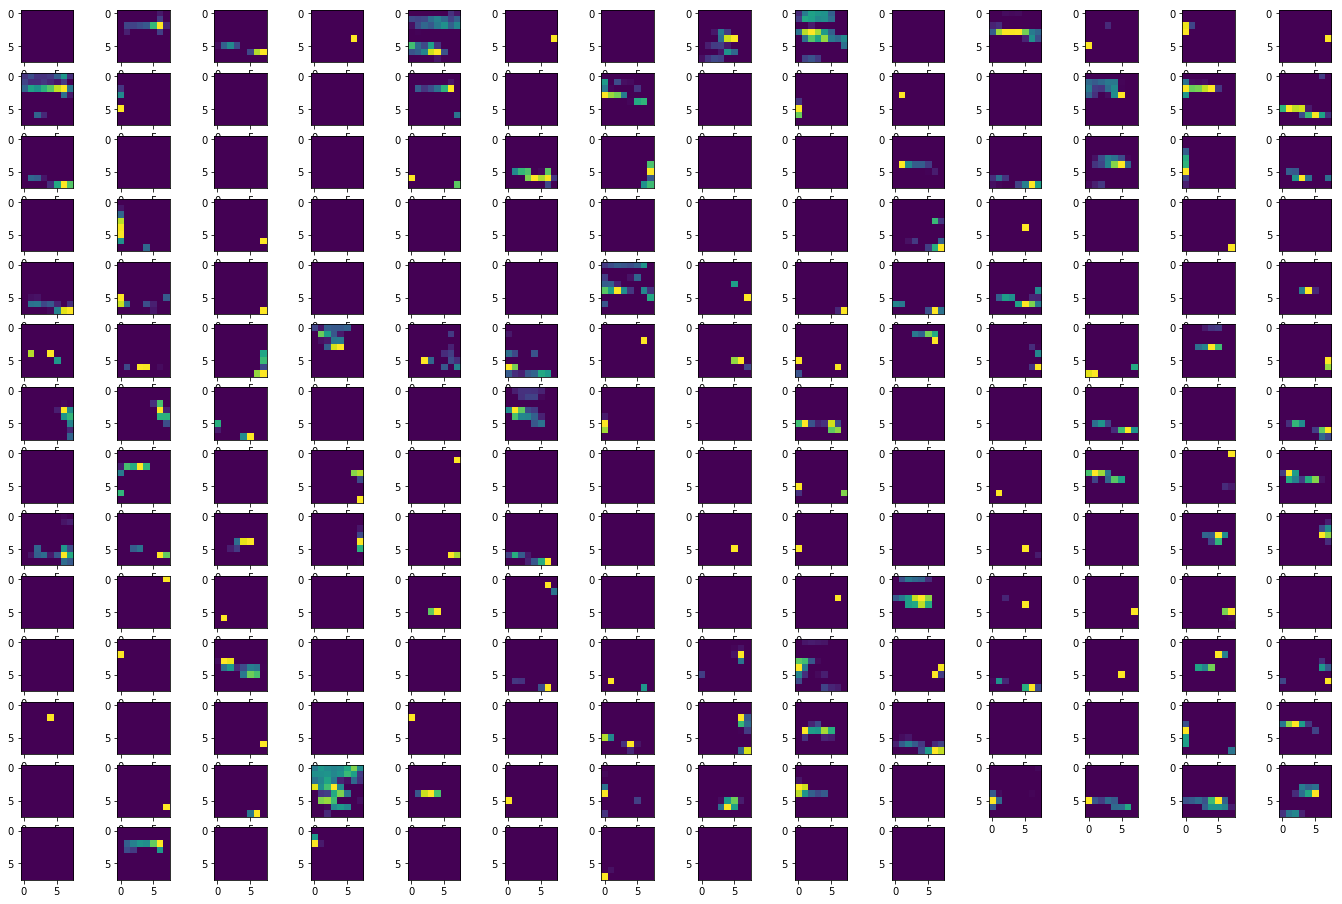

In [47]:
layer_to_visualize(act6)